In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dense, Embedding, Flatten, MaxPooling1D, Conv1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plotting(history):
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

## Question 01
- Build an ANN, 1D CNN, and LSTM using the IMDB dataset to predict sentiment (Optional, improve the models with some hyperparameter tuning).

### Loading the data

In [3]:
words = 5000

(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words = words)
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

17464789/17464789 [==============================] - 0s 0us/step


### Build ANN(DANN) model

Epoch 1/4
196/196 [==============================] - 32s 157ms/step - loss: 0.5366 - acc: 0.6952 - val_loss: 0.3298 - val_acc: 0.8537
Epoch 2/4
196/196 [==============================] - 29s 150ms/step - loss: 0.1971 - acc: 0.9234 - val_loss: 0.3175 - val_acc: 0.8652
Epoch 3/4
196/196 [==============================] - 27s 140ms/step - loss: 0.0599 - acc: 0.9834 - val_loss: 0.4109 - val_acc: 0.8635
Epoch 4/4
196/196 [==============================] - 28s 141ms/step - loss: 0.0106 - acc: 0.9983 - val_loss: 0.4934 - val_acc: 0.8649
Accuracy: 86.49%


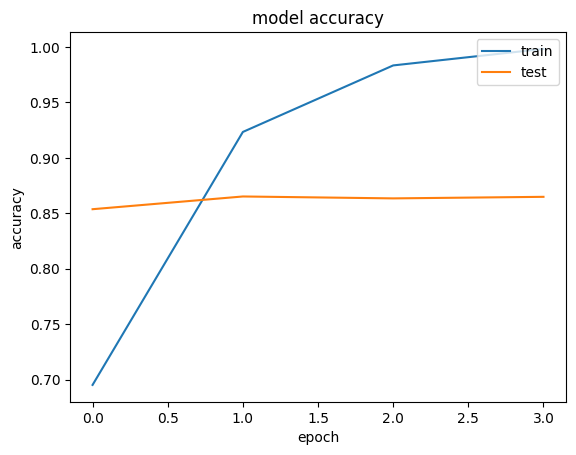

In [4]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

modelA = Sequential()
modelA.add(Embedding(5000, 32, input_length=500))
modelA.add(Flatten())
modelA.add(Dense(250, activation='relu'))
modelA.add(Dense(1, activation='sigmoid'))
modelA.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = modelA.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=4, batch_size=128)

# Final evaluation of the model
scores = modelA.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# summarize history for accuracy
plotting(history)

### Build 1D CNN model

Epoch 1/4
196/196 [==============================] - 33s 162ms/step - loss: 0.4618 - acc: 0.7430 - val_loss: 0.2747 - val_acc: 0.8867
Epoch 2/4
196/196 [==============================] - 31s 158ms/step - loss: 0.2148 - acc: 0.9169 - val_loss: 0.2664 - val_acc: 0.8889
Epoch 3/4
196/196 [==============================] - 31s 160ms/step - loss: 0.1461 - acc: 0.9459 - val_loss: 0.2981 - val_acc: 0.8830
Epoch 4/4
196/196 [==============================] - 31s 158ms/step - loss: 0.0826 - acc: 0.9752 - val_loss: 0.3568 - val_acc: 0.8757
Accuracy: 86.49%


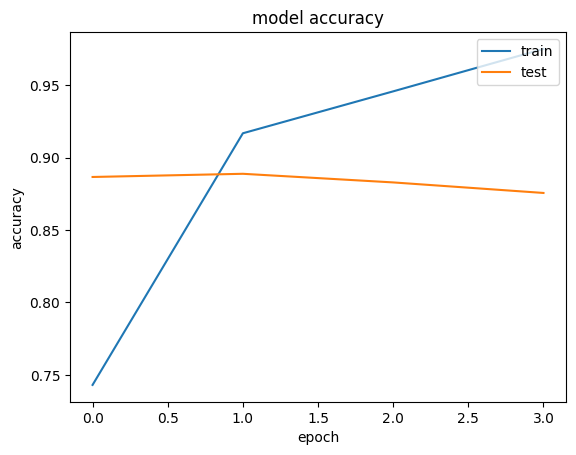

In [5]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

modelC = Sequential()
modelC.add(Embedding(5000, 32, input_length=500))
modelC.add(Conv1D(filters=32, kernel_size=3, padding='same', activation="relu"))
modelC.add(MaxPooling1D(pool_size=2))
modelC.add(Flatten())
modelC.add(Dense(250, activation='relu'))
modelC.add(Dense(1, activation='sigmoid'))
modelC.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = modelC.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=4, batch_size=128)

# Final evaluation of the model
scores = modelA.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# summarize history for accuracy
plotting(history)

### Build LSTM model

Epoch 1/4
196/196 [==============================] - 417s 2s/step - loss: 0.4889 - acc: 0.7475 - val_loss: 0.3537 - val_acc: 0.8514
Epoch 2/4
196/196 [==============================] - 415s 2s/step - loss: 0.2745 - acc: 0.8890 - val_loss: 0.3528 - val_acc: 0.8499
Epoch 3/4
196/196 [==============================] - 412s 2s/step - loss: 0.2455 - acc: 0.9040 - val_loss: 0.3057 - val_acc: 0.8764
Epoch 4/4
196/196 [==============================] - 408s 2s/step - loss: 0.2124 - acc: 0.9183 - val_loss: 0.3063 - val_acc: 0.8755
Accuracy: 87.55%


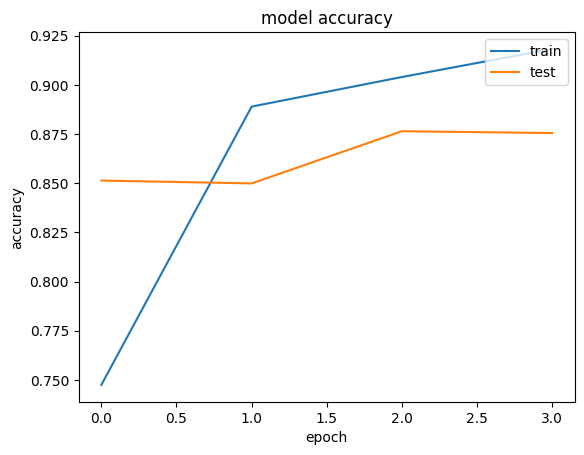

In [6]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# create the model
modelL = Sequential()
modelL.add(Embedding(5000, 32, input_length=500))
modelL.add(LSTM(128))
modelL.add(Dense(250, activation='relu'))
modelL.add(Dense(1, activation='sigmoid'))
modelL.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = modelL.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=4, batch_size=128)

# Final evaluation of the model
scores = modelL.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# summarize history for accuracy
plotting(history)

## Question 02
- Using 1D CNNs and LSTMs and the spam dataset, build a model to predict spam or not (Optional, improve the models with some hyperparameter tuning).

In [29]:
data = pd.read_csv("spam_or_not_spam.csv")
data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [31]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   2999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.3+ KB


### Definition to tokenize the inputs

In [32]:
# definition to tokenize the inputs
def tokenizer_sequences(num_words, X):

    # when calling the texts_to_sequences method, only the top num_words are considered while
    # the Tokenizer stores everything in the word_index during fit_on_texts
    tokenizer = Tokenizer(num_words=num_words)

    # From doc: By default, all punctuation is removed, turning the texts into space-separated sequences of words
    tokenizer.fit_on_texts(X)
    sequences = tokenizer.texts_to_sequences(X)

    return tokenizer, sequences

### Parameters

In [33]:
max_words = 10000
maxlen = 300

In [34]:
tokenizer, sequences = tokenizer_sequences(max_words, data["email"].copy())

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print("Using top: ", max_words,"tokens.")

print("Padding/shortining all emails to", maxlen, "words.")
X = pad_sequences(sequences, maxlen=maxlen)
Y = data["label"].values

np.random.seed(1)

# randomize the data set - numpy arrays
randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
Y = Y[randomize]

print('Shape of data :', X.shape)
print('Shape of label:', Y.shape)

print(X[:10])

Found 33672 unique tokens.
Using top:  10000 tokens.
Padding/shortining all emails to 300 words.
Shape of data : (2999, 300)
Shape of label: (2999,)
[[   0    0    0 ...    1    1    9]
 [ 369    1    1 ... 1024 1761 1134]
 [   0    0    0 ... 3012 1168 6746]
 ...
 [   0    0    0 ...  470  491    9]
 [   0    0    0 ... 2140 2465  254]
 [3160    4  471 ...  200    9    9]]


### Build 1D CNN

Epoch 1/3
75/75 [==============================] - 5s 55ms/step - loss: 0.3251 - acc: 0.8654 - val_loss: 0.1262 - val_acc: 0.9750
Epoch 2/3
75/75 [==============================] - 4s 57ms/step - loss: 0.0435 - acc: 0.9937 - val_loss: 0.0393 - val_acc: 0.9867
Epoch 3/3
75/75 [==============================] - 2s 31ms/step - loss: 0.0044 - acc: 0.9996 - val_loss: 0.0171 - val_acc: 0.9917


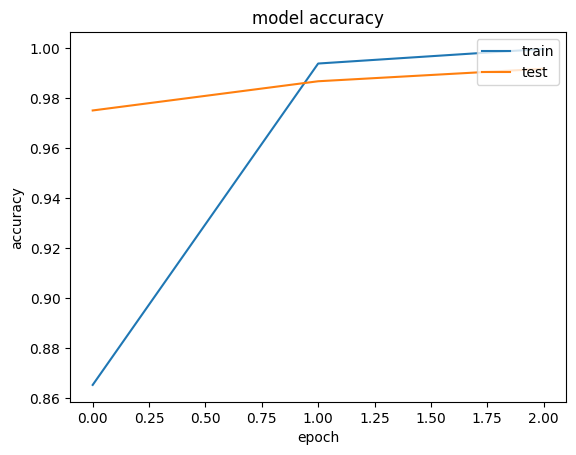

In [35]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

modelC2 = Sequential()
modelC2.add(Embedding((max_words), 32, input_length=maxlen))
modelC2.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
modelC2.add(MaxPooling1D(pool_size=2))
modelC2.add(Flatten())
modelC2.add(Dense(250, activation='relu'))
modelC2.add(Dense(1, activation='sigmoid'))

modelC2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

history = modelC2.fit(X, Y, validation_split=0.2, epochs=3, batch_size=32)

# summarize history for accuracy
plotting(history)

### Build LSTMs

Epoch 1/3
75/75 [==============================] - 28s 318ms/step - loss: 0.4925 - acc: 0.8287 - val_loss: 0.4550 - val_acc: 0.8300
Epoch 2/3
75/75 [==============================] - 23s 313ms/step - loss: 0.4263 - acc: 0.8345 - val_loss: 0.3072 - val_acc: 0.8300
Epoch 3/3
75/75 [==============================] - 22s 288ms/step - loss: 0.1388 - acc: 0.9454 - val_loss: 0.1064 - val_acc: 0.9583


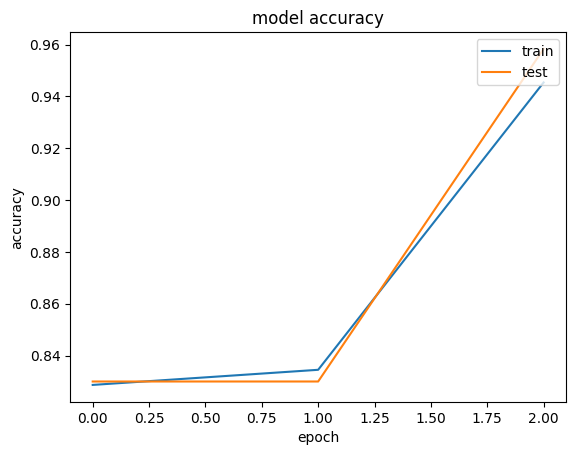

In [14]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

modelL2 = Sequential()
modelL2.add(Embedding((max_words), 32, input_length=maxlen))
modelL2.add(LSTM(64, return_sequences=True))
modelL2.add(LSTM(8))
modelL2.add(Flatten())
modelL2.add(Dense(250, activation='relu'))
modelL2.add(Dense(1, activation='sigmoid'))

modelL2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

history = modelL2.fit(X, Y, validation_split=0.2, epochs=3, batch_size=32)

# summarize history for accuracy
plotting(history)

## Question 03
- Build a transformer to predict sentiment using the IMDB dataset (Optional, improve the models with some hyperparameter tuning such as the number of attention heads).

### Transformer block

In [20]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

### Tokens and Positional Embedding

In [16]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

### Read IMDB Dataset

In [17]:
vocab_size = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review

df = pd.read_csv("rawIMDB.csv")
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [18]:
X = df["text"].copy()

tokenizer = Tokenizer(num_words=vocab_size)

# From doc: By default, all punctuation is removed, turning the texts into space-separated sequences of words
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

X = pad_sequences(sequences, maxlen=maxlen)

y = df["label"].values

np.random.seed(1)

# randomize the data set - numpy arrays
randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
y = y[randomize]

print('Shape of data :', X.shape)
print('Shape of label:', y.shape)

print(X[:10])

Shape of data : (40000, 200)
Shape of label: (40000,)
[[   0    0    0 ...  290    9   20]
 [   0    0    0 ...   24   40 4618]
 [   0    0    0 ...  415   26   50]
 ...
 [   1 3054   12 ...    4  493  290]
 [   0    0    0 ...  267  501    5]
 [   0    0    0 ... 2940  246 1002]]


### Build Model

Epoch 1/4
625/625 [==============================] - 84s 131ms/step - loss: 0.4140 - acc: 0.7900 - val_loss: 0.2852 - val_acc: 0.8799
Epoch 2/4
625/625 [==============================] - 84s 134ms/step - loss: 0.1982 - acc: 0.9243 - val_loss: 0.2942 - val_acc: 0.8822
Epoch 3/4
625/625 [==============================] - 101s 162ms/step - loss: 0.1228 - acc: 0.9578 - val_loss: 0.4088 - val_acc: 0.8540
Epoch 4/4
625/625 [==============================] - 80s 128ms/step - loss: 0.0749 - acc: 0.9755 - val_loss: 0.4616 - val_acc: 0.8640


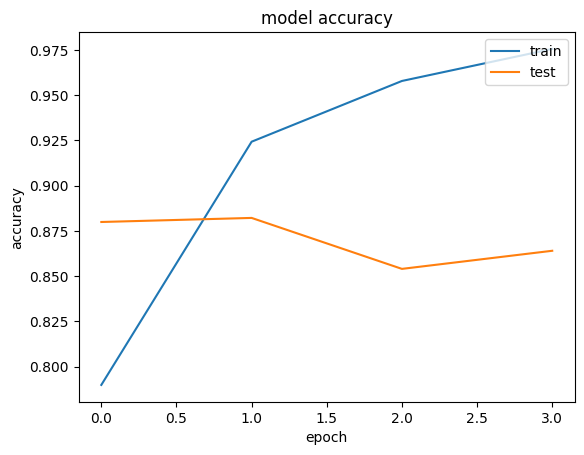

In [21]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(2, activation="softmax")(x)

modelT = tf.keras.Model(inputs=inputs, outputs=outputs)

modelT.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
history = modelT.fit(X,y, batch_size=32, epochs=4, validation_split=0.50)

plotting(history)

## Question 04
- For each previous question, create a sentence and predict its sentiment/spam. (Please note you will have to tokenize it using the previously fitted function, there is an example in the spamExample file. For the IMDB you will have to manually import the dataset: [1])

### Question 02

#### CNN

In [36]:
mySentence1 = "You have won €2000000 in our national lottery, please reply with your bank details"
mySentence2 = "gary lawrence murphy wrote it is a myth that we don t use parts of our brain."

data = [mySentence1, mySentence2]

unseenData = tokenizer.texts_to_sequences(data)
#print(unseenData)

Xunseen = pad_sequences(unseenData, maxlen=300)

#print(Xunseen)
results = modelC2.predict(Xunseen)
print("\n")
for i in range(len(Xunseen)):
    print("Sentence:", data[i], "\nPrediction:", end="")
    if results[i][0] > 0.5:
        print("\tSpam\n\n")
    else:
        print("\tNot Spam\n\n")

1/1 [==============================] - 0s 87ms/step


Sentence: You have won €2000000 in our national lottery, please reply with your bank details 
Prediction:	Spam


Sentence: gary lawrence murphy wrote it is a myth that we don t use parts of our brain. 
Prediction:	Not Spam




#### LSTM

In [37]:
mySentence1 = "You have won €2000000 in our national lottery, please reply with your bank details"
mySentence2 = "gary lawrence murphy wrote it is a myth that we don t use parts of our brain."

data = [mySentence1, mySentence2]

unseenData = tokenizer.texts_to_sequences(data)
#print(unseenData)

Xunseen = pad_sequences(unseenData, maxlen=maxlen)

#print(Xunseen)
results = modelL2.predict(Xunseen)

print("\n")
for i in range(len(Xunseen)):
    print("Sentence:", data[i], "\nPrediction:", end="")
    if results[i][0] > 0.5:
        print("\tSpam\n\n")
    else:
        print("\tNot Spam\n\n")

1/1 [==============================] - 2s 2s/step


Sentence: You have won €2000000 in our national lottery, please reply with your bank details 
Prediction:	Spam


Sentence: gary lawrence murphy wrote it is a myth that we don t use parts of our brain. 
Prediction:	Not Spam




### Question 03

In [23]:
mySentence1 = "The movie is boring."
mySentence2 = "This was not a bad movie at all."

data = [mySentence1, mySentence2]

unseenData = tokenizer.texts_to_sequences(data)
#print(unseenData)

Xunseen = pad_sequences(unseenData, maxlen=maxlen)

#print(Xunseen)

results = modelT.predict(Xunseen)

print("\n")
for i in range(len(Xunseen)):
    print("Sentence:", data[i], "\nPrediction:", end="")
    if np.argmax(results[i]) == 1:
        print("\tPositive Sentiment\n\n")
    else:
        print("\tNegative Sentiment\n\n")

1/1 [==============================] - 0s 194ms/step


Sentence: The movie is boring. 
Prediction:	Negative Sentiment


Sentence: This was not a bad movie at all. 
Prediction:	Negative Sentiment


